<a href="https://colab.research.google.com/github/lima-breno/time_series/blob/main/TS_14_Sazonais_SARIMAXpassageiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelos SARIMA

Este notebook busca uma série temporal de um arquivo escolhido e faz algumas análises preliminares, bem como a aplicação dos modelos SARIMA com parâmetros $(p,d,q)(P,D,Q)_m$.

Data da última atualização: 17/03/2025

#### Preliminares

In [ ]:
# Carregamento das bibliotecas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Ajuste das preferências gráficas

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#FFFFFF',    # Cor da moldura
    'axes.facecolor': '#FFFFFF',      # Cor do fundo
    'savefig.facecolor':'#000000',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': True,
    'grid.color': '#888888',
    'grid.linewidth': '0.1',
    'text.color': '#000000',
    'axes.labelcolor': '#000000',
    'xtick.color': '#000000',
    'ytick.color': '#000000',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (21,13)

#### Carregamento da Série Temporal

In [ ]:
# Leitura do arquivo de dados
MinhaSerieTemporal = pd.read_csv('Passageiros.csv', index_col = 0)

# Ajuste do índice para formato DateTime
MinhaSerieTemporal.index = pd.to_datetime(MinhaSerieTemporal.index)

# Exibição do DataFrame
MinhaSerieTemporal

,Passageiros (milhares)
Mês,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


#### Análise da Série

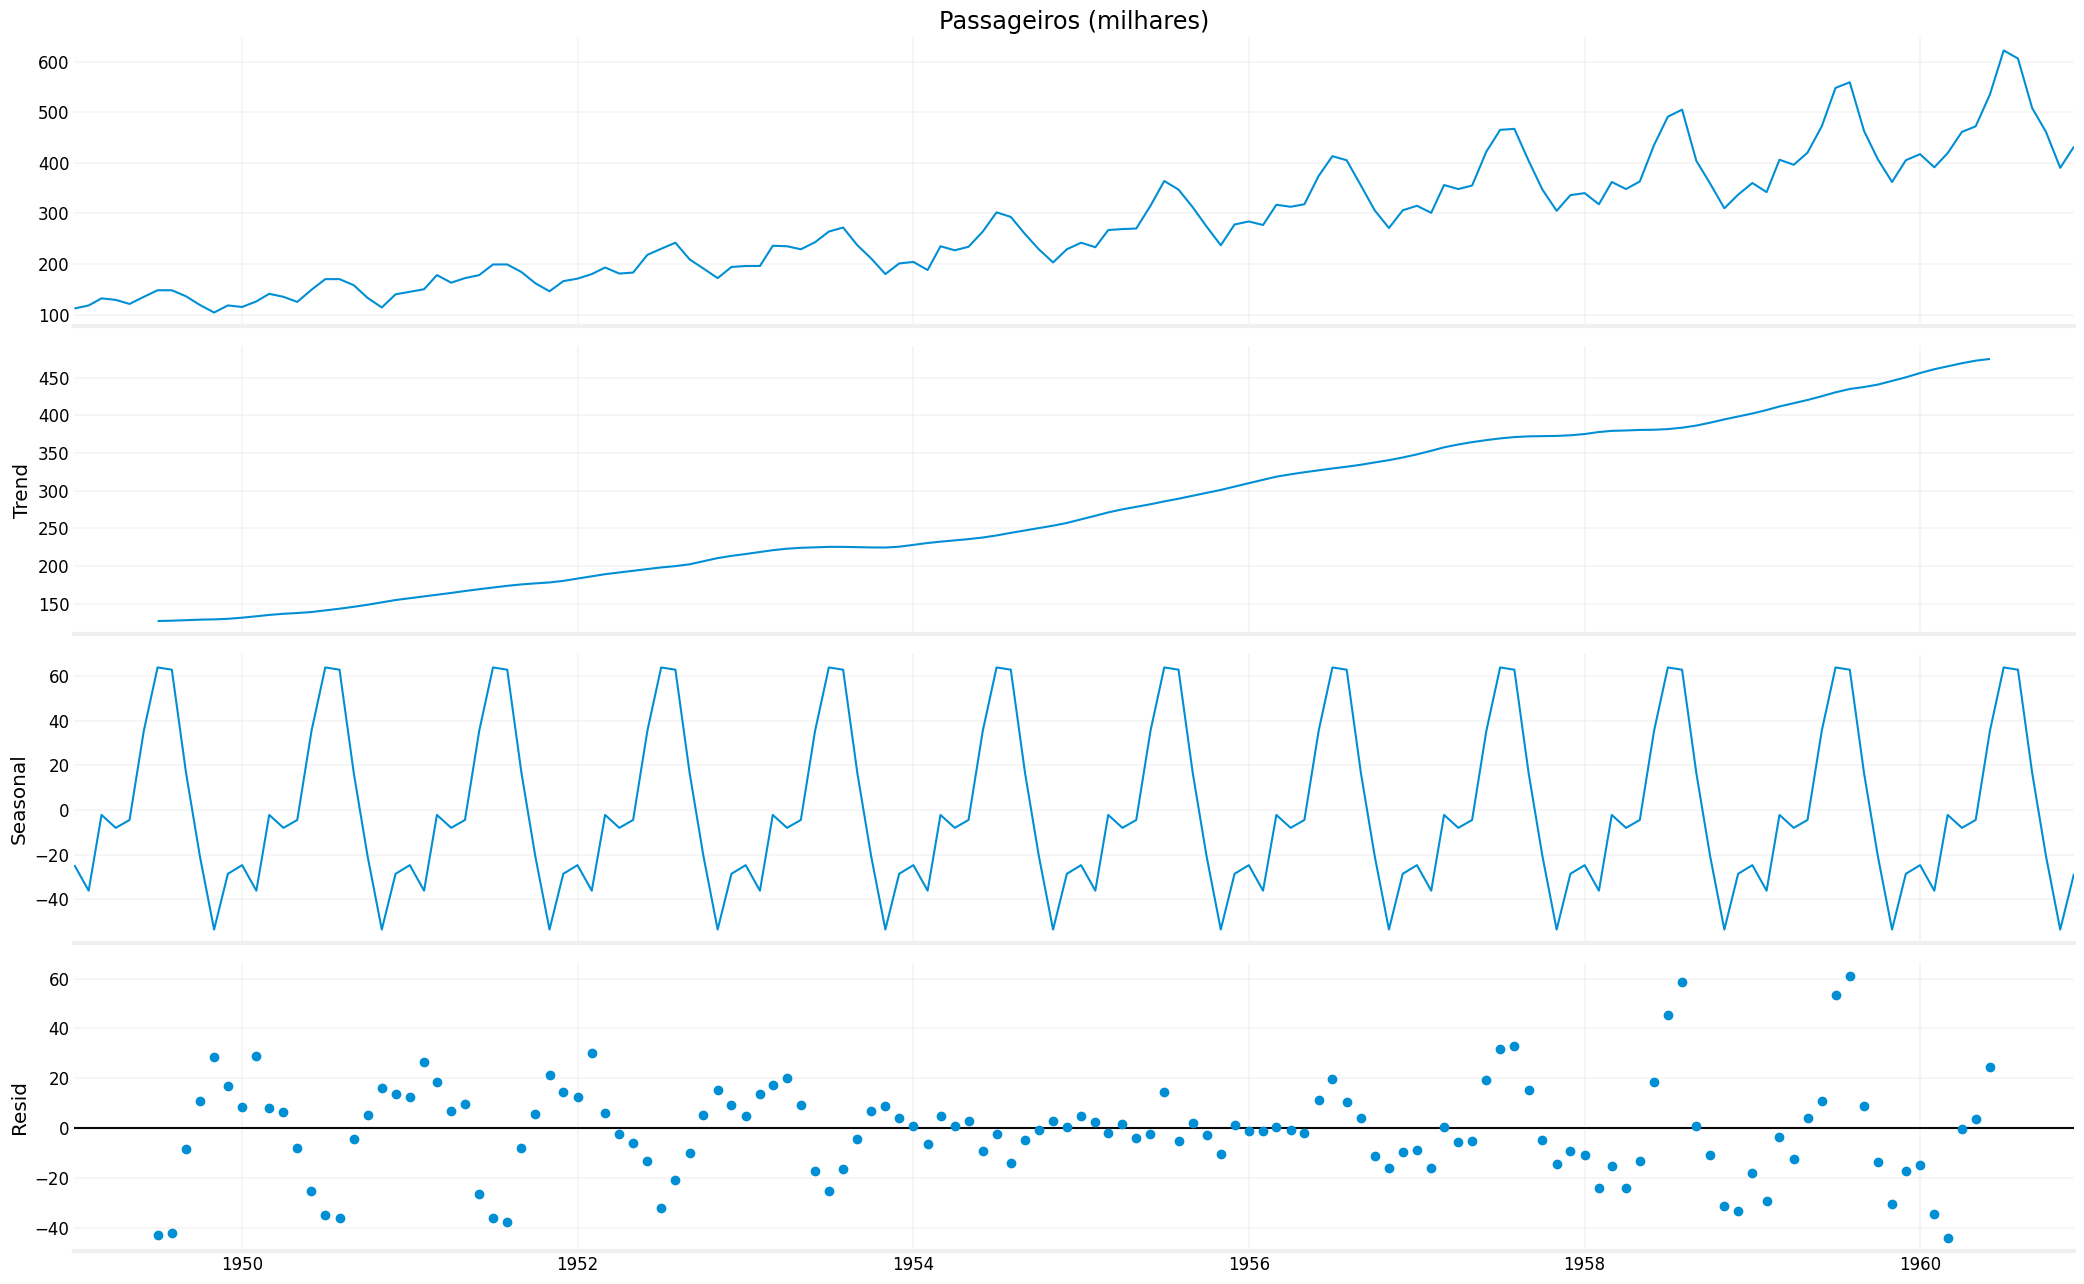

In [ ]:
# Decomposição aditiva da série temporal

PeriodoSazonal = 12     # Sazonalidade anual

Decomposicao = seasonal_decompose(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], model = "add", period = PeriodoSazonal)

Decomposicao.plot();

#### Separação das bases de treino e teste

<Axes: xlabel='Mês'>

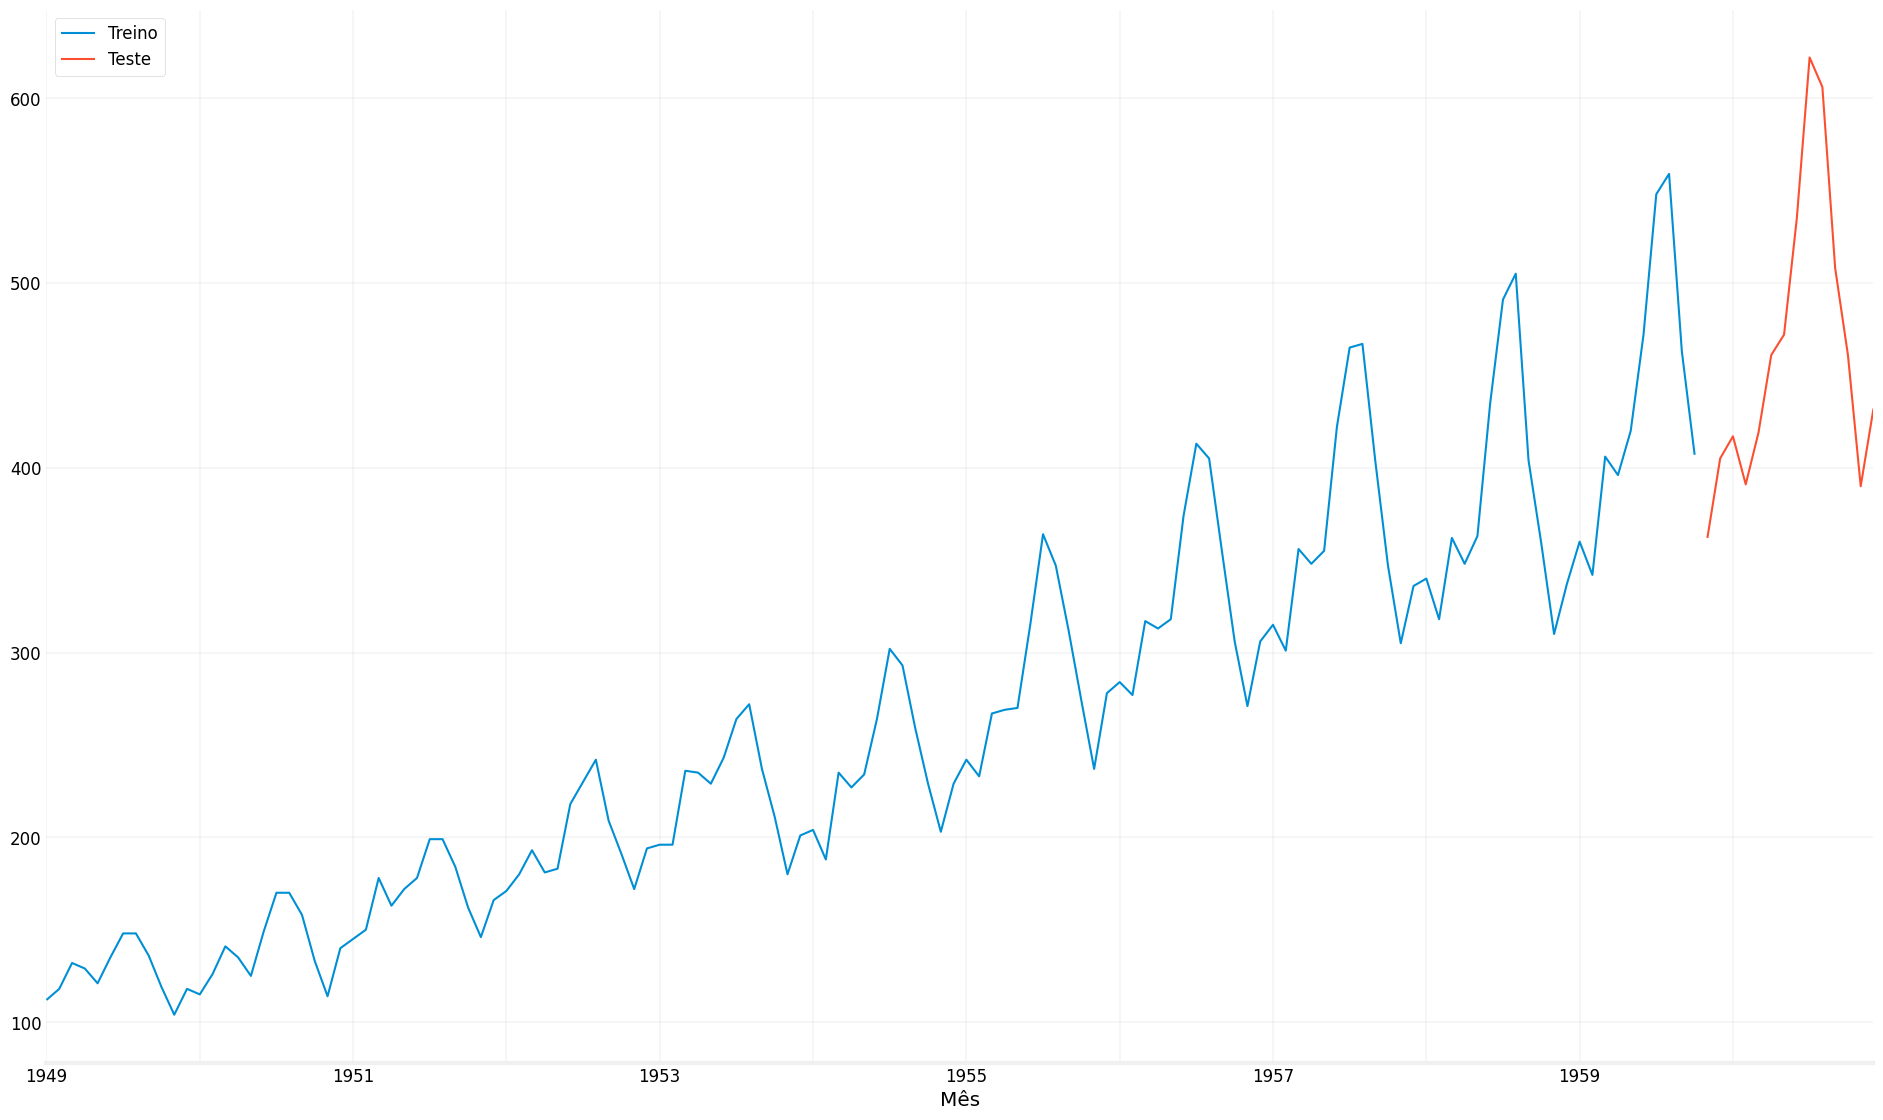

In [ ]:
# Definição da proporção de dados para compor a base de teste

PercentualTeste = 10

# Cálculo do tamanho do período de testes
PeriodoTeste = PercentualTeste * len(MinhaSerieTemporal) // 100

# Definição do DataFrame de treino
TreinoDF = pd.DataFrame(index = MinhaSerieTemporal[:-PeriodoTeste].index)
TreinoDF['Treino'] = MinhaSerieTemporal[:-PeriodoTeste][MinhaSerieTemporal.columns[0]]

# Definição do DataFrame de teste
TesteDF  = pd.DataFrame(index = MinhaSerieTemporal[-PeriodoTeste:].index)
TesteDF['Teste'] = MinhaSerieTemporal[-PeriodoTeste:][MinhaSerieTemporal.columns[0]]

# Exibe a série temporal, com a separação da base de dados
pd.concat([TreinoDF,TesteDF], axis = 1).plot()

#### Previsão pelo modelo SARIMA

In [ ]:
# Definição da ordem de autorregressividade
p = 3

# Definição da ordem de integração
d = 1

# Definição da ordem da média móvel
q = 2

# Definição da ordem de autorregressividade sazonal
P = 2

# Definição da ordem de integração sazonal
D = 1

# Definição da ordem da média móvel sazonal
Q = 1

# Período da sazonalidade
m = 12

In [ ]:
InstanteInicial = dt.datetime.now()

# Realiza o ajuste do modelo escolhido
model = SARIMAX(TreinoDF, order=(p,d,q), seasonal_order = (P,D,Q,m))
model_fit = model.fit()

InstanteFinal = dt.datetime.now()

print(f'Tempo gasto com o modelo SARIMA: {str(InstanteFinal - InstanteInicial)}')
model_fit.summary()

C:\Users\leopo\.conda\envs\PUCminas\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\leopo\.conda\envs\PUCminas\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Tempo gasto com o modelo SARIMA: 0:00:01.218639


C:\Users\leopo\.conda\envs\PUCminas\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               Treino   No. Observations:                  130
Model:             SARIMAX(3, 1, 2)x(2, 1, [1], 12)   Log Likelihood                -433.463
Date:                              Mon, 17 Mar 2025   AIC                            884.927
Time:                                      01:59:37   BIC                            909.786
Sample:                                  01-01-1949   HQIC                           895.019
                                       - 10-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4660      0.527      0.884      0.376      -0.567       1.499
ar.L2         -0.2056      0.391     -0.526      0.599      -0.972       0.561
ar.L3         -0.2713      0.183     -1.482      0.138      -0.630       0.088
ma.L1         -0.7718      0.531     -1.455      0.146      -1.812       0.268
ma.L2          0.4579      0.475      0.964      0.335      -0.473       1.389
ar.S.L12       0.7331      0.296      2.476      0.013       0.153       1.313
ar.S.L24       0.2653      0.111      2.387      0.017       0.047       0.483
ma.S.L12      -0.9735      2.061     -0.472      0.637      -5.013       3.065
sigma2        85.9513    152.014      0.565      0.572    -211.991     383.894
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.91   Prob(JB):                         0.98
Heteroskedasticity (H):               1.58   Skew:                            -0.05
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

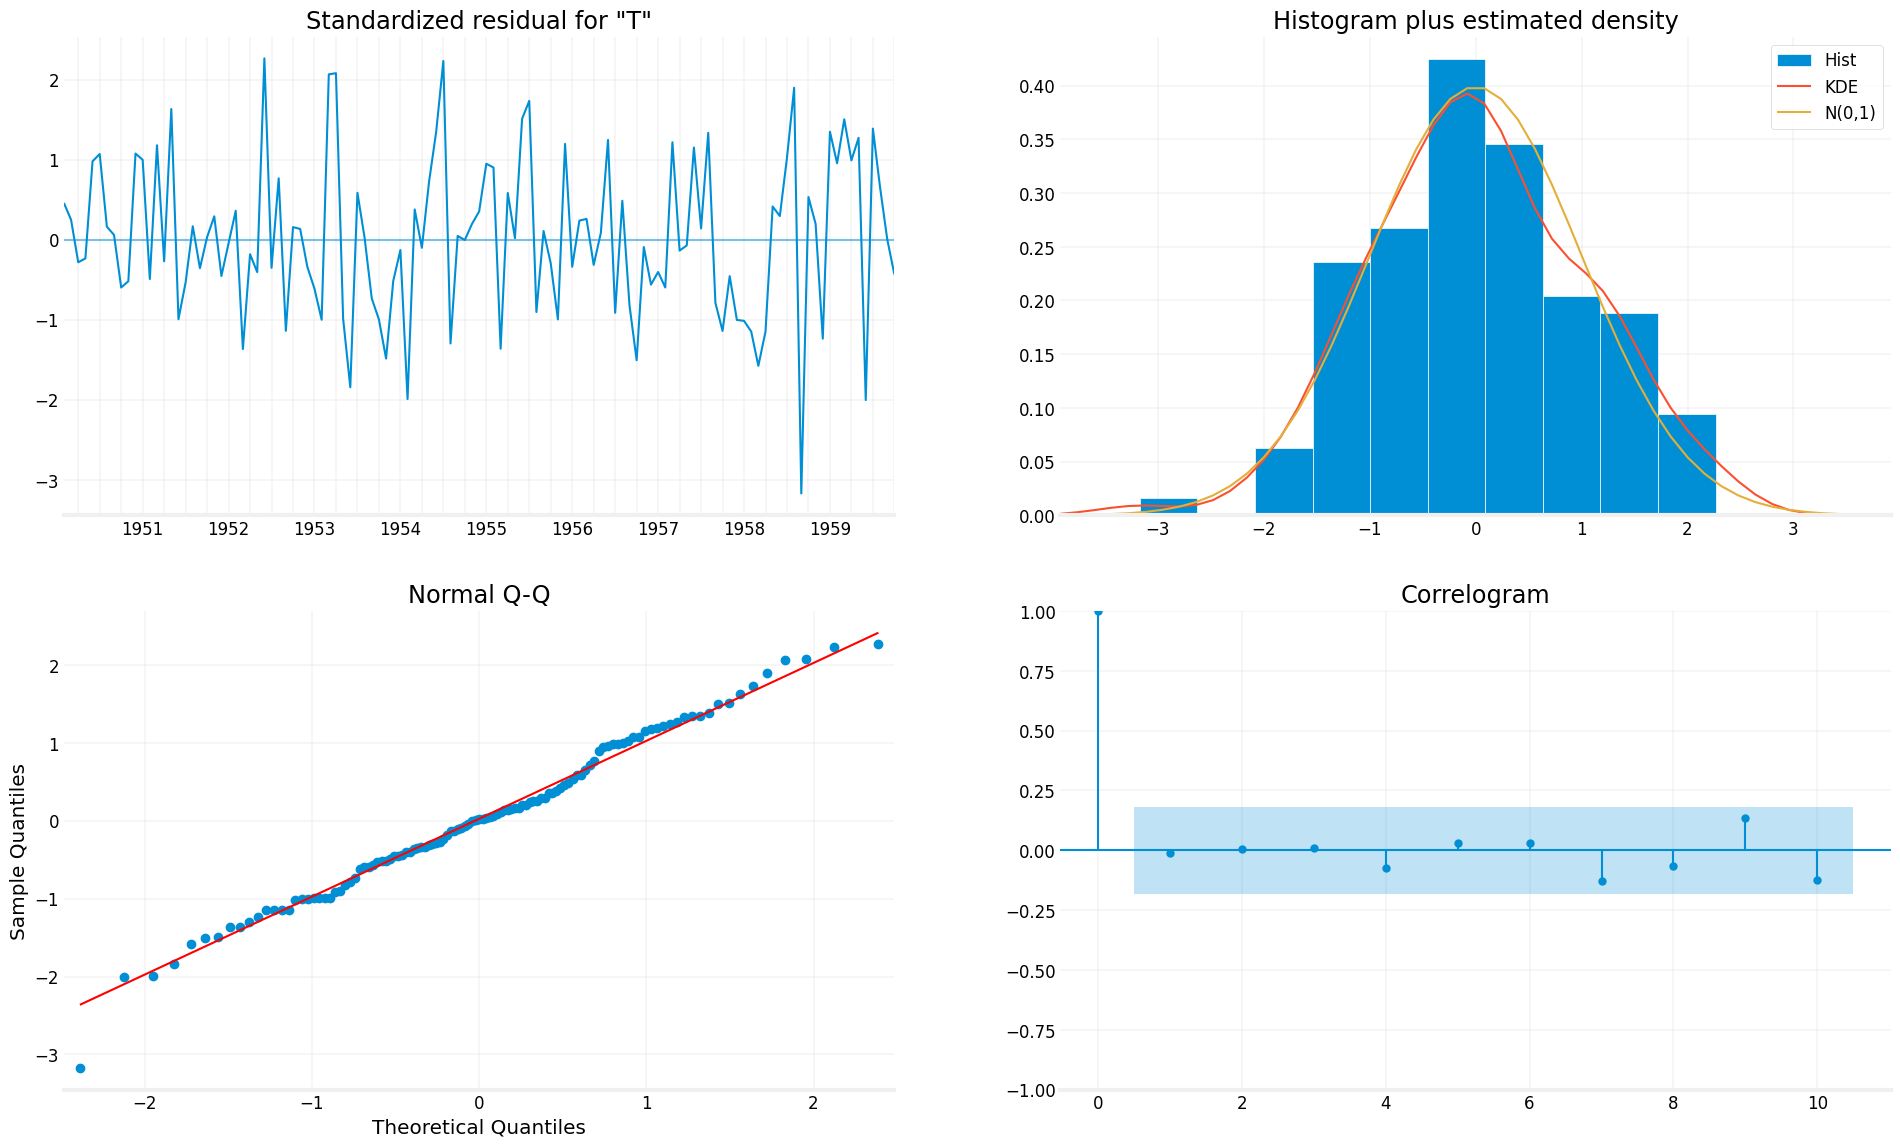

In [ ]:
model_fit.plot_diagnostics();

In [ ]:
# Define o horizonte futuro de previsões out-of-sample
HorizontePrev = 2   # anos a prever fora da amostra

# Realiza as previsões com o modelo ajustado
PrevisoesSARIMAX = model_fit.get_prediction(len(TreinoDF), len(TreinoDF) + len(TesteDF) - 1 + HorizontePrev * 12).predicted_mean


<Axes: >

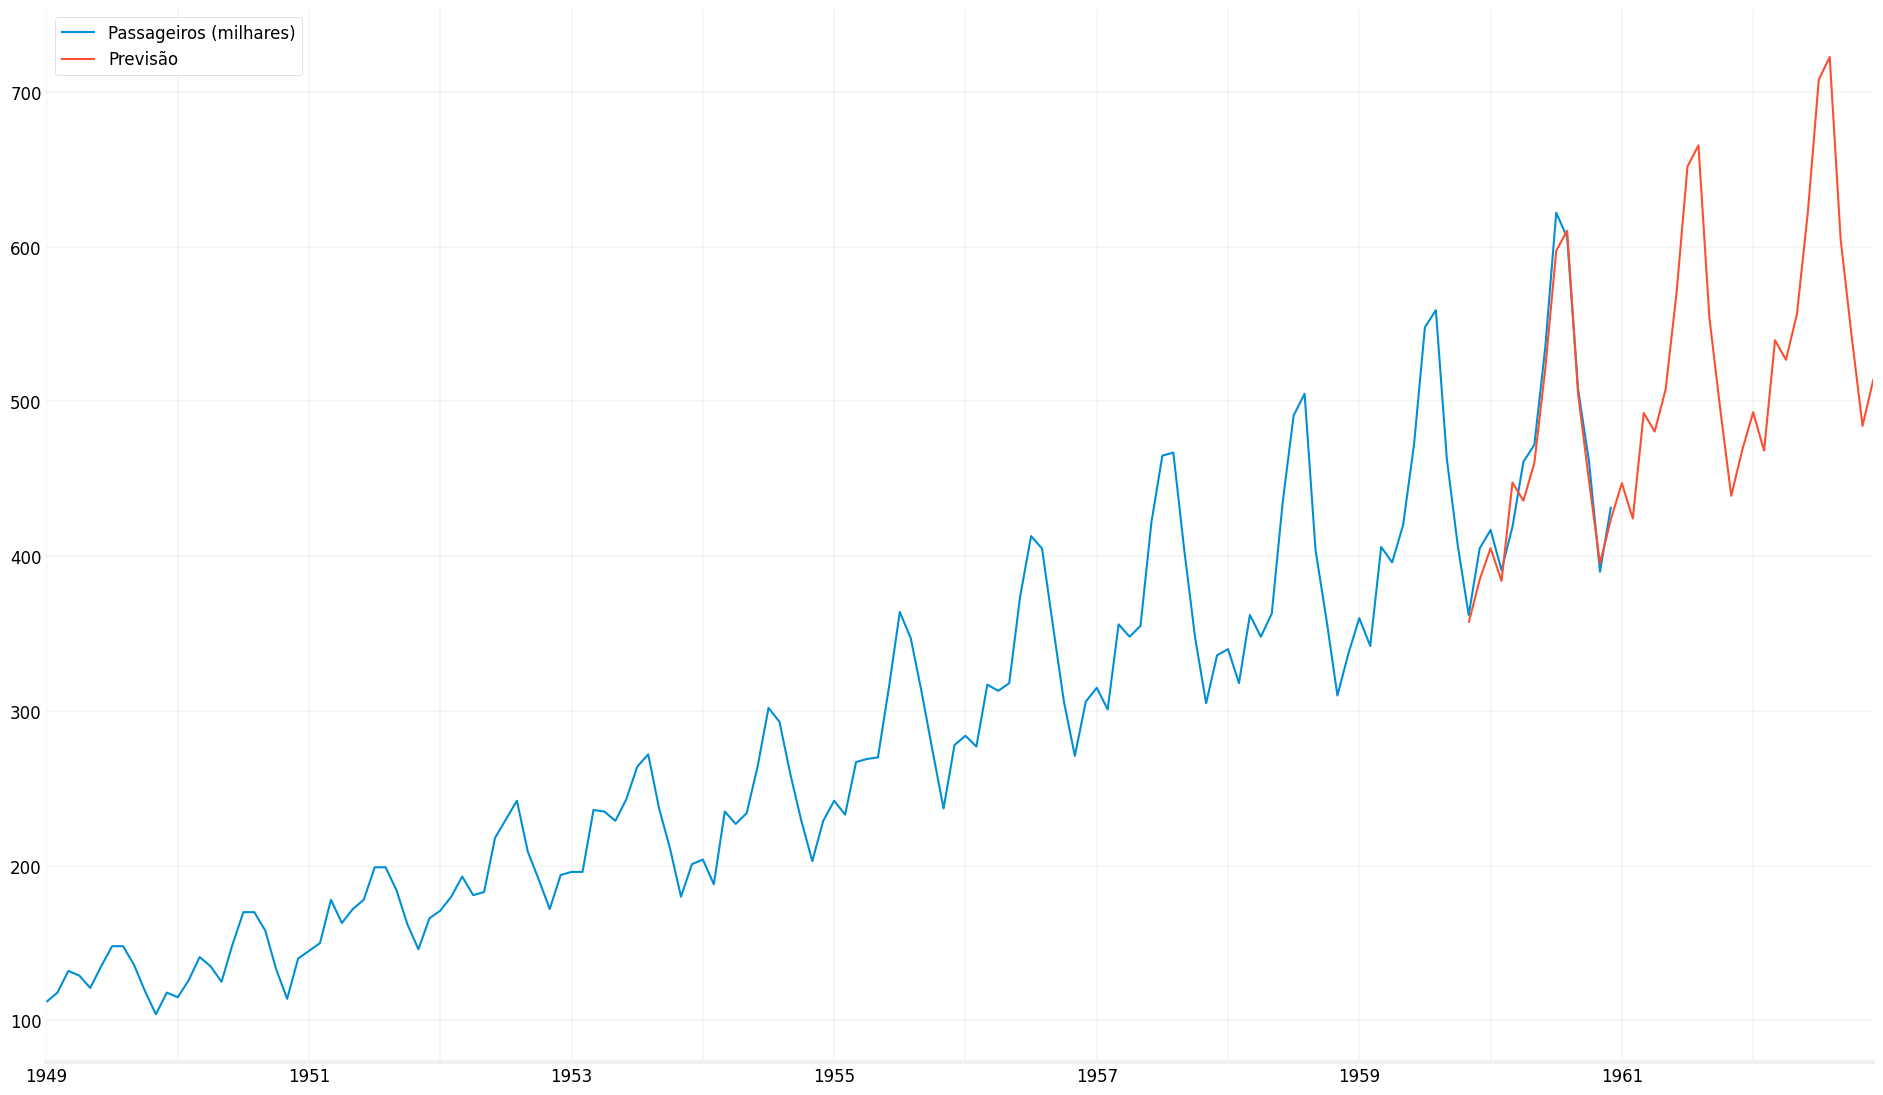

In [ ]:
# Montagem do índice do DataFrame de previsão, com as datas futuras
DatasPrevisoes = [str(MinhaSerieTemporal[-PeriodoTeste:].index[k].date()) for k in range(len(MinhaSerieTemporal[-PeriodoTeste:].index))]
for ano in range(1961,1961 + HorizontePrev):
    DatasPrevisoes = DatasPrevisoes+ [f"{ano}-{mes:02d}-01" for mes in range(1,13)]

# Montagem do DataFrame de previsão
PrevisoesDF  = pd.DataFrame(index = pd.to_datetime(DatasPrevisoes))
PrevisoesDF['Previsão'] = PrevisoesSARIMAX

# Exibe a série temporal, com a separação da base de dados
pd.concat([MinhaSerieTemporal,PrevisoesDF], axis = 1).plot()